<a href="https://colab.research.google.com/github/Abhilashkaundal/Image-clasiification/blob/main/PYTHON_PYTORCH_CNN_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!nvidia-smi


Sat Apr  9 05:17:02 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**DATA LOADING**

In [ ]:
import torchvision
import torchvision.transforms as transforms
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transforms)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


check the downlooad 


In [ ]:
trainset= torchvision.datasets.CIFAR10(root='./data',train=True, download=True,transform=transforms.ToTensor())

Files already downloaded and verified


**classes**

In [ ]:

classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

**Load the data**


In [ ]:
trainloader= torch.utils.data.DataLoader(trainset,batch_size=6,shuffle=True)

**Iteration**

In [ ]:
dataiter= iter(trainloader)
images,labels = dataiter.next()
print(images.shape)
print(images[1].shape)
print(labels[1].item())

torch.Size([6, 3, 32, 32])
torch.Size([3, 32, 32])
6


**Visualise data**

In [ ]:
img= images[1]
print(type(img))

car_count = len(list('car/*.jpg'))

cat_count = len(list('cat/*.jpg'))
dog_count = len(list('dog/*.jpg'))
deer_count = len(list('deer/*.jpg'))
truck_count= len(list('truck/*.jpg'))
print(car_count)
print(cat_count)
print(dog_count)
print(deer_count)
print(truck_count)


<class 'torch.Tensor'>
9
9
9
10
11


In [ ]:
np_img= img.numpy()
print(np_img.shape)
print(type(np_img))

(3, 32, 32)
<class 'numpy.ndarray'>


In [ ]:
np_img= np.transpose(np_img,(1,2,0))
print(np_img.shape)

(32, 32, 3)


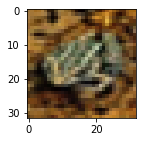

In [ ]:
plt.figure(figsize=(5,2))
plt.imshow(np_img)
plt.show()

In [ ]:
def imshow(img):
   np_img= img.numpy()
   plt.imshow(np.transpose(np_img,(1,2,0)))
   plt.show()

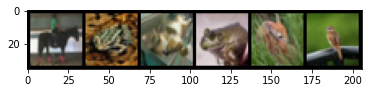

horse* frog* cat* frog* deer* bird


In [ ]:

imshow(torchvision.utils.make_grid(images))
print("* ".join(classes[labels[j]] for j in range(6)))


**SINGLE CONVOLUTION LAYERS**

In [ ]:
 import torch.nn as nn

class  Firstcnn(nn.Module):
   def __init__(self):
     super(Firstcnn,self).__init__()

     self.Conv1=nn.Conv2d(3,16,3)

   def forward(self,x):
     x= self.Conv1(x)
     return(x) 


In [ ]:
net=Firstcnn()

In [ ]:
out = net(images)
out.shape

torch.Size([6, 16, 30, 30])

PARAMETERS BAIS AND VARIANCE


In [ ]:
for param in net.parameters():
  print(param.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


(30, 30)


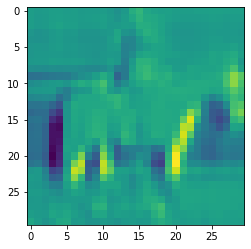

In [ ]:
out1= out[0,0,:,:].detach().numpy() 
print(out1.shape)
plt.imshow(out[0,0,:,:].detach().numpy() )
plt.show()

**DEEP  CONVOLUTION LAYERS**

In [ ]:

class  Firstcnn2(nn.Module):
   def __init__(self):
     super(Firstcnn2,self).__init__()

     self.model=nn.Sequential(
          nn.Conv2d(3,8,3),
          nn.Conv2d(8,16,3)
     )

   def forward(self,x):
     x= self.model(x)
     return(x) 


In [ ]:
net= Firstcnn2()
out= net(images)
out.shape

torch.Size([6, 16, 28, 28])

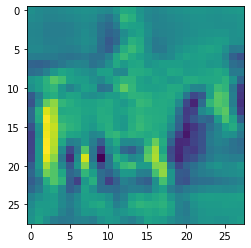

In [ ]:
plt.imshow(out[0,0,:,:].detach().numpy())

In [ ]:
 import torch.nn as nn
class  Firstcnn3(nn.Module):
   def __init__(self):
     super(Firstcnn3,self).__init__()

     self.model=nn.Sequential(
          nn.Conv2d(3,6,5),   # (N,3,32,32)-->[N,6,28,28]
          nn.AvgPool2d(2,stride=2),#[N,6,28,28]-->[N,6,14,14]
          nn.Conv2d(6,16,5),#[N,16,10,10]
          nn.AvgPool2d(2,stride=2)#[N,16,5,5]
     )

   def forward(self,x):
     x= self.model(x)
     return(x) 

In [ ]:
net= Firstcnn3()
out= net(images)
out.shape


torch.Size([6, 16, 5, 5])

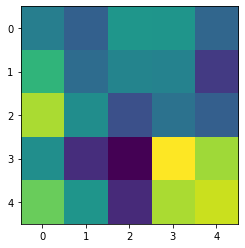

In [ ]:
plt.imshow(out[0,0,:,:].detach().numpy())

**LEE NET LAYERS**

In [ ]:
from torch.nn.modules.activation import Tanh
class  Lenet(nn.Module):
   def __init__(self):
     super(Lenet,self).__init__()

     self.cnn_model=nn.Sequential(
          nn.Conv2d(3,6,5),   # (N,3,32,32)-->[N,6,28,28]
          nn.ReLU(),
          nn.AvgPool2d(2,stride=2),#[N,6,28,28]-->[N,6,14,14]
          nn.Conv2d(6,16,5),  #[N,16,10,10]
          nn.ReLU(),  
          nn.AvgPool2d(2,stride=2)#[N,16,5,5]
     )
     self.fc_model = nn.Sequential(
         nn.Linear(400,120),
         nn.Tanh(),
         nn.Linear(120,84),
         nn.Tanh(),
         nn.Linear(84,10)
     )

   def forward(self,x):
     print(x.shape)
     x=self.cnn_model(x)
     print(x.shape)
     x=x.view(x.size(0),-1)
     print(x.shape)

     x= self.fc_model(x)
     print(x.shape)
     return(x) 

In [ ]:
net= Lenet()
out= net(images)

torch.Size([6, 3, 32, 32])
torch.Size([6, 16, 5, 5])
torch.Size([6, 400])
torch.Size([6, 10])


**visualization**

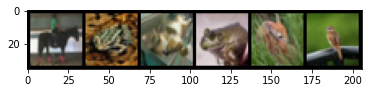

In [ ]:
imshow(torchvision.utils.make_grid(images))

In [ ]:
 net= net.to('cpu')
 

In [ ]:
out = net(images)


torch.Size([6, 3, 32, 32])
torch.Size([6, 16, 5, 5])
torch.Size([6, 400])
torch.Size([6, 10])


In [ ]:
out=net.cnn_model[0](images)
out.shape

torch.Size([6, 6, 28, 28])

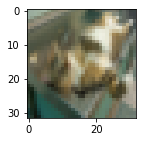

In [ ]:
image_id=2
plt.figure(figsize=(2,2))
imshow(images[image_id,])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


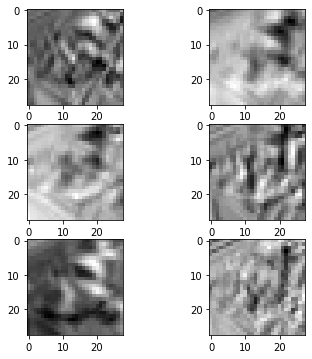

In [ ]:
plt.figure(figsize=(6,6))
plt.subplot(321)
for i in range(6):
  ax1= plt.subplot(3,2,i+1)
  plt.imshow(out[image_id,i,:,:].detach().numpy(),cmap='binary')
plt.show()



**LARGE CNNS**


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else'cpu')
print(device)

cuda:0


**IMAGE TRANSOFRS**

dataset transforms and visualization


In [ ]:
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])]) 
                    

test_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.5, 0.5, 0.5], 
                                                            [0.5, 0.5, 0.5])])

In [ ]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=train_transforms)

testset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=test_transforms)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
num_classes=10
batch_size=4

In [ ]:
trainloader= torch.utils.data.DataLoader(trainset,batch_size=batch_size, shuffle=True)

In [ ]:
dataiter = iter(trainloader)
images,labels = dataiter.next()

print(images.shape)
print(images[1].shape)

print(labels.shape)
print(labels[1].item())


torch.Size([4, 3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([4])
1


In [ ]:
def imshow(img,title):
   np_img= img.numpy()  / 2 +0.5
   plt.figsize=(batch_size,2)
   plt.axis('on')
   plt.imshow(np.transpose(np_img,(1,2,0)))
   plt.title(title)
   plt.show()

In [ ]:
def show_batch_images(dataLoader):
  images,labels = next(iter(dataLoader))
  img= torchvision.utils.make_grid(images)
  imshow(img,title =(str(x.item())for i in labels))

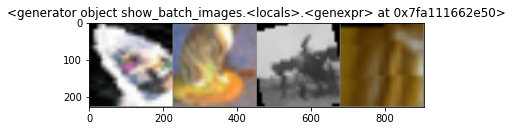

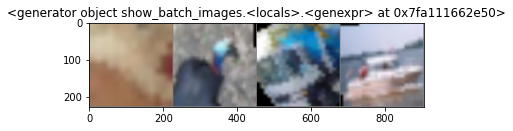

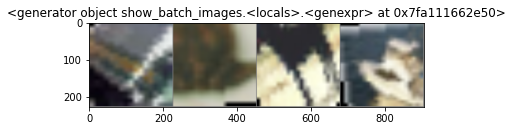

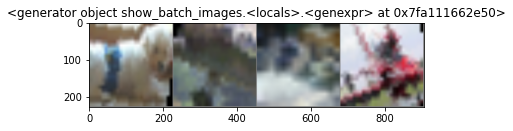

In [ ]:
for i in range(4):
      show_batch_images(trainloader)

**VISUAL GEOMETRY GROUP** (VGG)

In [ ]:
from torchvision import models

In [ ]:
vgg= models.vgg16_bn()
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [ ]:
 print(vgg.features[0])

Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [ ]:
print(vgg.avgpool)
print(vgg.classifier[2])

AdaptiveAvgPool2d(output_size=(7, 7))
Dropout(p=0.5, inplace=False)


In [ ]:
final_in_features = vgg.classifier[6].in_features
mod_classifier = list(vgg.classifier.children())[:-1]
mod_classifier.extend([nn.Linear(final_in_features,num_classes)])
print(mod_classifier)


[Linear(in_features=25088, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=10, bias=True)]


In [ ]:
vgg.classifier = nn.Sequential(*mod_classifier)
print(vgg.classifier)

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=10, bias=True)
)


**TRAIN CIFAR10**

In [ ]:
batch_size = 16
trainloader= torch.utils.data.DataLoader(trainset,batch_size=batch_size, shuffle=True)
testloader= torch.utils.data.DataLoader(testset,batch_size=batch_size, shuffle=True)

In [ ]:
vgg= vgg.to(device)
loss_fn= nn.CrossEntropyLoss()
opt = optim.SGD(vgg.parameters(), lr = 0.5)

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]